In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
df = pd.read_csv('winequality-red.csv', sep=';')

In [6]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [7]:
X = df.drop('quality', axis=1)
y = df['quality']

In [10]:
y = y.values - 3

array([0, 1, 2, 3, 4, 5])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_train = np.array(X_train, np.float32)
X_test = np.array(X_test, np.float32)
y_train = np.array(y_train, np.int32)
y_test = np.array(y_test, np.int32)

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(11,)),
    tf.keras.layers.Dense(units=10, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(units=6, activation='softmax')
])

model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
hist = model.fit(X_train, y_train,
                 batch_size=10,
                 epochs=50,
                 validation_data=(X_test, y_test))

Epoch 1/50
112/112 [==============================] - 0s 1ms/step - loss: 0.9357 - accuracy: 0.5979 - val_loss: 0.9518 - val_accuracy: 0.6229
Epoch 2/50
112/112 [==============================] - 0s 1ms/step - loss: 0.9419 - accuracy: 0.5827 - val_loss: 0.9493 - val_accuracy: 0.6396
Epoch 3/50
112/112 [==============================] - 0s 1ms/step - loss: 0.9404 - accuracy: 0.5916 - val_loss: 0.9468 - val_accuracy: 0.6396
Epoch 4/50
112/112 [==============================] - 0s 1ms/step - loss: 0.9341 - accuracy: 0.5943 - val_loss: 0.9486 - val_accuracy: 0.6333
Epoch 5/50
112/112 [==============================] - 0s 1ms/step - loss: 0.9447 - accuracy: 0.5862 - val_loss: 0.9514 - val_accuracy: 0.6292
Epoch 6/50
112/112 [==============================] - 0s 1ms/step - loss: 0.9576 - accuracy: 0.5818 - val_loss: 0.9499 - val_accuracy: 0.6375
Epoch 7/50
112/112 [==============================] - 0s 1ms/step - loss: 0.9569 - accuracy: 0.5755 - val_loss: 0.9484 - val_accuracy: 0.6333
Epoch 

In [28]:
result = pd.DataFrame(hist.history)
result

,loss,accuracy,val_loss,val_accuracy
0,0.935697,0.597855,0.951769,0.622917
1,0.941925,0.582663,0.949278,0.639583
2,0.940433,0.591600,0.946847,0.639583
3,0.934124,0.594281,0.948608,0.633333
4,0.944667,0.586238,0.951383,0.629167
5,0.957562,0.581769,0.949882,0.637500
6,0.956916,0.575514,0.948361,0.633333
7,0.955931,0.574620,0.952018,0.618750
8,0.948420,0.581769,0.950077,0.635417
9,0.967696,0.571939,0.954272,0.637500


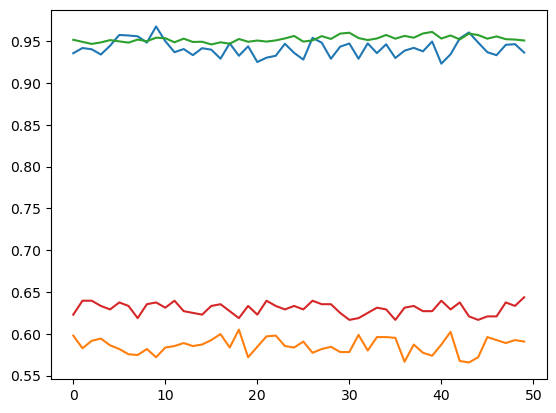

In [29]:
plt.plot(result)